In [696]:
#!pip install prophet

In [1]:
#pip install nest-asyncio

In [698]:
import pystan

In [699]:
#!pip install  cmdstanpy==1.0.4

In [700]:
#!pip install fbprophet

In [701]:
from fbprophet import Prophet

In [3]:
import pandas as pd
import numpy as np

In [4]:
from prophet.plot import plot_plotly, plot_components_plotly

In [5]:
df=pd.read_csv("Gold_data.csv")

In [ ]:
df.head(5)

In [6]:
df.tail(1)

,date,price
2181,2021-12-21,4346.5


In [706]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [707]:
df.shape

(2182, 2)

In [708]:
df.drop_duplicates(inplace=True)

In [709]:
df.shape  # no duplicates

(2182, 2)

In [710]:
df.isna().sum()

date     0
price    0
dtype: int64

In [711]:
# converting date to timestamp:
df["date"]=pd.to_datetime(df["date"])

In [712]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2182 non-null   datetime64[ns]
 1   price   2182 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 51.1 KB


In [713]:
# fbprophet needs date column name as ds and other column i.e price as y:
df.columns=['ds','y']

In [714]:
df.head(2)

,ds,y
0,2016-01-01,2252.6
1,2016-01-02,2454.5


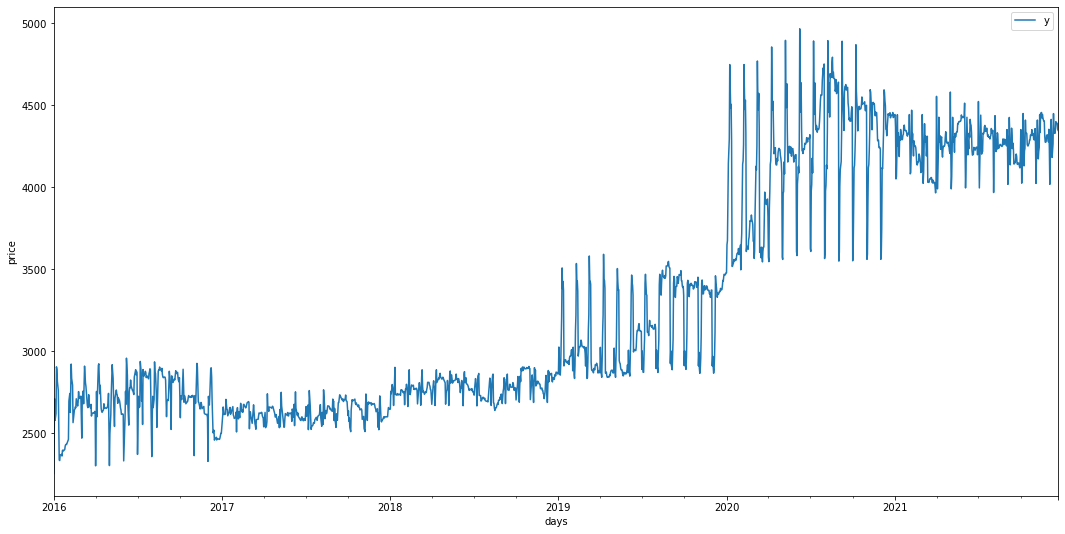

In [715]:
#plotting the original data: 
import matplotlib.pyplot as plt
df.plot(x="ds",y='y',figsize=(18,9))
plt.xlabel("days")
plt.ylabel("price")
plt.show()

## Splitting data:


In [716]:
len(df)

2182

In [717]:
train=df.iloc[:len(df)-182]
test=df.iloc[len(df)-182:]

In [718]:
train

,ds,y
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
1995,2021-06-18,4195.30
1996,2021-06-19,4199.70
1997,2021-06-20,4199.70
1998,2021-06-21,4243.20


In [719]:
test

,ds,y
2000,2021-06-23,4232.3
2001,2021-06-24,4225.8
2002,2021-06-25,4238.9
2003,2021-06-26,4242.3
2004,2021-06-27,4244.4
...,...,...
2177,2021-12-17,4394.4
2178,2021-12-18,4389.5
2179,2021-12-19,4389.5
2180,2021-12-20,4354.1


In [720]:
train.shape

(2000, 2)

In [721]:
test.shape

(182, 2)

In [722]:
# initializing the model:
model=Prophet()

In [723]:
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [724]:
future = model.make_future_dataframe(periods=182) 

In [725]:
future
#gets appended to the train 

,ds
0,2016-01-01
1,2016-01-02
2,2016-01-03
3,2016-01-04
4,2016-01-05
...,...
2177,2021-12-17
2178,2021-12-18
2179,2021-12-19
2180,2021-12-20


In [726]:
train.tail(1)

,ds,y
1999,2021-06-22,4232.7


In [727]:
len(future),len(train)

(2182, 2000)

In [728]:
forecast=model.predict(future)

In [729]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,2596.061483,2411.464576,2851.767745,2596.061483,2596.061483,31.599593,31.599593,31.599593,-2.313321,-2.313321,-2.313321,33.912914,33.912914,33.912914,0.0,0.0,0.0,2627.661076
1,2016-01-02,2596.835292,2416.812972,2841.317547,2596.835292,2596.835292,40.937359,40.937359,40.937359,1.154713,1.154713,1.154713,39.782646,39.782646,39.782646,0.0,0.0,0.0,2637.772651
2,2016-01-03,2597.609101,2419.438815,2860.399669,2597.609101,2597.609101,43.089328,43.089328,43.089328,-1.442461,-1.442461,-1.442461,44.531789,44.531789,44.531789,0.0,0.0,0.0,2640.698429
3,2016-01-04,2598.382910,2429.380707,2869.459804,2598.382910,2598.382910,46.585954,46.585954,46.585954,-1.531447,-1.531447,-1.531447,48.117400,48.117400,48.117400,0.0,0.0,0.0,2644.968863
4,2016-01-05,2599.156719,2440.215874,2852.683085,2599.156719,2599.156719,51.932690,51.932690,51.932690,1.412666,1.412666,1.412666,50.520024,50.520024,50.520024,0.0,0.0,0.0,2651.089409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,2021-12-17,4315.878689,3938.075426,4467.503211,4190.889744,4427.815882,-106.569020,-106.569020,-106.569020,-2.313321,-2.313321,-2.313321,-104.255699,-104.255699,-104.255699,0.0,0.0,0.0,4209.309668
2178,2021-12-18,4315.902533,3961.549599,4487.852433,4189.464473,4428.922708,-95.265910,-95.265910,-95.265910,1.154713,1.154713,1.154713,-96.420623,-96.420623,-96.420623,0.0,0.0,0.0,4220.636623
2179,2021-12-19,4315.926377,3944.376363,4464.775914,4188.039202,4430.029533,-89.168715,-89.168715,-89.168715,-1.442461,-1.442461,-1.442461,-87.726254,-87.726254,-87.726254,0.0,0.0,0.0,4226.757662
2180,2021-12-20,4315.950221,3977.333256,4498.034757,4186.643343,4431.136359,-79.823637,-79.823637,-79.823637,-1.531447,-1.531447,-1.531447,-78.292190,-78.292190,-78.292190,0.0,0.0,0.0,4236.126584


In [730]:
forecast[["ds","yhat_lower","yhat_upper","yhat"]]

,ds,yhat_lower,yhat_upper,yhat
0,2016-01-01,2411.464576,2851.767745,2627.661076
1,2016-01-02,2416.812972,2841.317547,2637.772651
2,2016-01-03,2419.438815,2860.399669,2640.698429
3,2016-01-04,2429.380707,2869.459804,2644.968863
4,2016-01-05,2440.215874,2852.683085,2651.089409
...,...,...,...,...
2177,2021-12-17,3938.075426,4467.503211,4209.309668
2178,2021-12-18,3961.549599,4487.852433,4220.636623
2179,2021-12-19,3944.376363,4464.775914,4226.757662
2180,2021-12-20,3977.333256,4498.034757,4236.126584


In [731]:
test.head()

,ds,y
2000,2021-06-23,4232.3
2001,2021-06-24,4225.8
2002,2021-06-25,4238.9
2003,2021-06-26,4242.3
2004,2021-06-27,4244.4


In [732]:
test.tail()

,ds,y
2177,2021-12-17,4394.4
2178,2021-12-18,4389.5
2179,2021-12-19,4389.5
2180,2021-12-20,4354.1
2181,2021-12-21,4346.5


In [733]:
plot_plotly(model,forecast)

In [734]:
plot_components_plotly(model,forecast)

In [735]:
train

,ds,y
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
1995,2021-06-18,4195.30
1996,2021-06-19,4199.70
1997,2021-06-20,4199.70
1998,2021-06-21,4243.20


In [736]:
test

,ds,y
2000,2021-06-23,4232.3
2001,2021-06-24,4225.8
2002,2021-06-25,4238.9
2003,2021-06-26,4242.3
2004,2021-06-27,4244.4
...,...,...
2177,2021-12-17,4394.4
2178,2021-12-18,4389.5
2179,2021-12-19,4389.5
2180,2021-12-20,4354.1


In [737]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,2596.061483,2411.464576,2851.767745,2596.061483,2596.061483,31.599593,31.599593,31.599593,-2.313321,-2.313321,-2.313321,33.912914,33.912914,33.912914,0.0,0.0,0.0,2627.661076
1,2016-01-02,2596.835292,2416.812972,2841.317547,2596.835292,2596.835292,40.937359,40.937359,40.937359,1.154713,1.154713,1.154713,39.782646,39.782646,39.782646,0.0,0.0,0.0,2637.772651
2,2016-01-03,2597.609101,2419.438815,2860.399669,2597.609101,2597.609101,43.089328,43.089328,43.089328,-1.442461,-1.442461,-1.442461,44.531789,44.531789,44.531789,0.0,0.0,0.0,2640.698429
3,2016-01-04,2598.382910,2429.380707,2869.459804,2598.382910,2598.382910,46.585954,46.585954,46.585954,-1.531447,-1.531447,-1.531447,48.117400,48.117400,48.117400,0.0,0.0,0.0,2644.968863
4,2016-01-05,2599.156719,2440.215874,2852.683085,2599.156719,2599.156719,51.932690,51.932690,51.932690,1.412666,1.412666,1.412666,50.520024,50.520024,50.520024,0.0,0.0,0.0,2651.089409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,2021-12-17,4315.878689,3938.075426,4467.503211,4190.889744,4427.815882,-106.569020,-106.569020,-106.569020,-2.313321,-2.313321,-2.313321,-104.255699,-104.255699,-104.255699,0.0,0.0,0.0,4209.309668
2178,2021-12-18,4315.902533,3961.549599,4487.852433,4189.464473,4428.922708,-95.265910,-95.265910,-95.265910,1.154713,1.154713,1.154713,-96.420623,-96.420623,-96.420623,0.0,0.0,0.0,4220.636623
2179,2021-12-19,4315.926377,3944.376363,4464.775914,4188.039202,4430.029533,-89.168715,-89.168715,-89.168715,-1.442461,-1.442461,-1.442461,-87.726254,-87.726254,-87.726254,0.0,0.0,0.0,4226.757662
2180,2021-12-20,4315.950221,3977.333256,4498.034757,4186.643343,4431.136359,-79.823637,-79.823637,-79.823637,-1.531447,-1.531447,-1.531447,-78.292190,-78.292190,-78.292190,0.0,0.0,0.0,4236.126584


In [738]:
forecast["yhat"][-182:]

2000    4308.660610
2001    4311.720870
2002    4312.349088
2003    4319.564314
2004    4320.506363
           ...     
2177    4209.309668
2178    4220.636623
2179    4226.757662
2180    4236.126584
2181    4249.133160
Name: yhat, Length: 182, dtype: float64

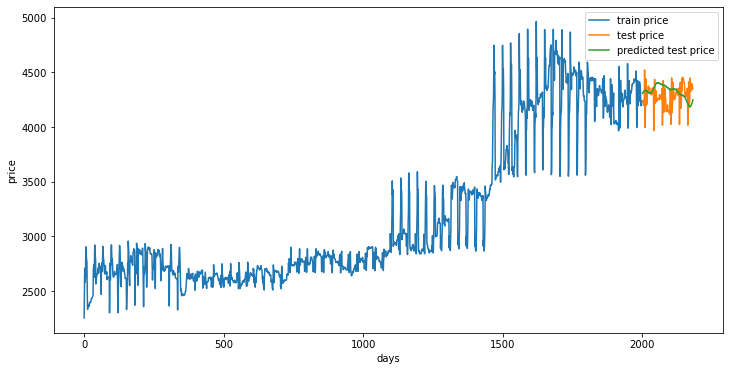

In [739]:
train["y"].plot(legend=True, label="train price",figsize=(12,6))
test["y"].plot(legend=True, label="test price")
forecast["yhat"][-182:].plot(legend=True,label="predicted test price")
plt.xlabel("days")
plt.ylabel("price")
plt.show()

In [740]:
len(forecast["yhat"][-182:])

182

In [741]:
len(test)

182

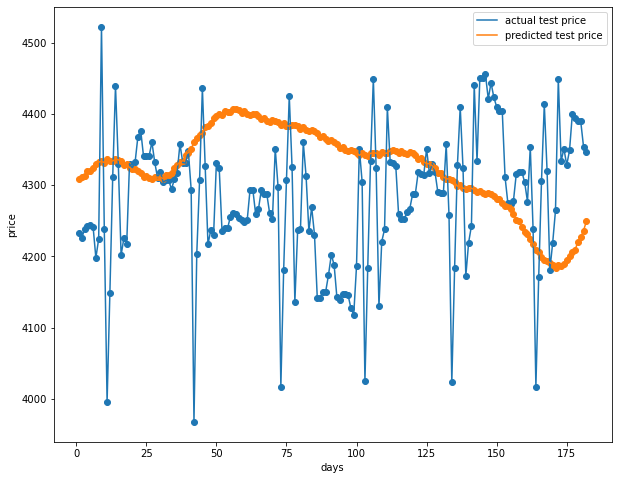

In [742]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(np.arange(1,len(test)+1),test["y"])
plt.plot(np.arange(1,len(test)+1),test["y"])

plt.scatter(np.arange(1,len(test)+1),forecast["yhat"][-182:])
plt.plot(np.arange(1,len(test)+1),forecast["yhat"][-182:])
plt.xlabel("days")
plt.ylabel("price")
plt.legend(["actual test price","predicted test price"])

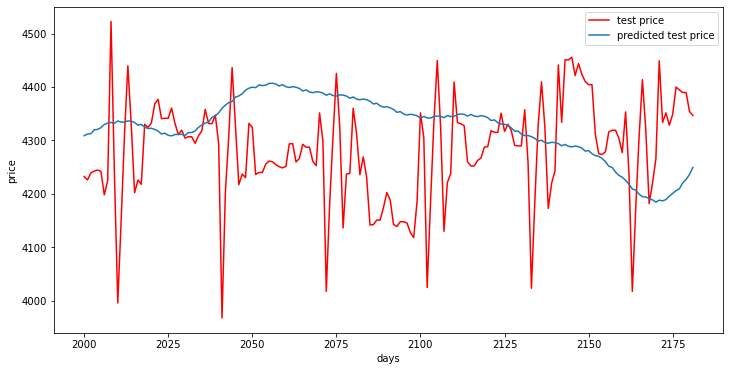

In [743]:
test["y"].plot(legend=True, label="test price",figsize=(12,6),c="r")
forecast["yhat"][-182:].plot(legend=True,label="predicted test price")
plt.xlabel("days")
plt.ylabel("price")
plt.show()

## evaluating the model:

In [744]:
from statsmodels.tools.eval_measures import rmse

In [745]:
predictions=forecast.iloc[-182:]["yhat"]

In [746]:
predictions.head(20)

2000    4308.660610
2001    4311.720870
2002    4312.349088
2003    4319.564314
2004    4320.506363
2005    4323.672246
2006    4329.517708
2007    4332.380590
2008    4333.550205
2009    4331.830456
2010    4336.301246
2011    4334.174503
2012    4334.028705
2013    4336.408257
2014    4335.744477
2015    4333.422473
2016    4328.341689
2017    4329.674746
2018    4324.720978
2019    4322.138609
Name: yhat, dtype: float64

In [747]:
print("rmse is:",rmse(test["y"],predictions))
print("Mean value of test dataset is:",test["y"].mean())

rmse is: 129.37206472899683
Mean value of test dataset is: 4281.391208791207


In [748]:
rmse(test["y"],predictions).round(3)

129.372

In [749]:
rmse=129.372

In [750]:
#rmse value:
rmse

129.372

In [751]:
##Evaluation Metric MAPE
def MAPE(org,pred):
    temp = np.abs((org-pred)/org)*100
    return np.mean(temp)

In [752]:
MAPE(test["y"],predictions)

2.4431351406710737

# BUILDING THE FINAL MODEL:


In [592]:
df

,ds,y
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [593]:
model=Prophet()

In [594]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [595]:
future = model.make_future_dataframe(periods=200)

In [596]:
future

,ds
0,2016-01-01
1,2016-01-02
2,2016-01-03
3,2016-01-04
4,2016-01-05
...,...
2377,2022-07-05
2378,2022-07-06
2379,2022-07-07
2380,2022-07-08


In [597]:
forecast=model.predict(future)

In [598]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,2595.101560,2407.373901,2829.961291,2595.101560,2595.101560,30.464723,30.464723,30.464723,-3.695019,-3.695019,-3.695019,34.159742,34.159742,34.159742,0.0,0.0,0.0,2625.566283
1,2016-01-02,2595.831958,2424.738624,2844.678895,2595.831958,2595.831958,40.009219,40.009219,40.009219,1.159670,1.159670,1.159670,38.849550,38.849550,38.849550,0.0,0.0,0.0,2635.841177
2,2016-01-03,2596.562356,2413.968961,2843.446773,2596.562356,2596.562356,41.152141,41.152141,41.152141,-1.389921,-1.389921,-1.389921,42.542062,42.542062,42.542062,0.0,0.0,0.0,2637.714497
3,2016-01-04,2597.292754,2422.861906,2851.607466,2597.292754,2597.292754,45.397637,45.397637,45.397637,0.188023,0.188023,0.188023,45.209614,45.209614,45.209614,0.0,0.0,0.0,2642.690392
4,2016-01-05,2598.023153,2434.679552,2870.127464,2598.023153,2598.023153,48.024935,48.024935,48.024935,1.179863,1.179863,1.179863,46.845072,46.845072,46.845072,0.0,0.0,0.0,2646.048088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,2022-07-05,4211.303611,3981.557400,4468.383202,4100.820696,4310.307761,16.059941,16.059941,16.059941,1.179863,1.179863,1.179863,14.880078,14.880078,14.880078,0.0,0.0,0.0,4227.363552
2378,2022-07-06,4211.088460,3973.884098,4473.684035,4098.553150,4311.455077,15.511127,15.511127,15.511127,0.888169,0.888169,0.888169,14.622958,14.622958,14.622958,0.0,0.0,0.0,4226.599587
2379,2022-07-07,4210.873309,3979.202911,4452.948871,4096.285603,4311.757986,15.694726,15.694726,15.694726,1.669215,1.669215,1.669215,14.025511,14.025511,14.025511,0.0,0.0,0.0,4226.568035
2380,2022-07-08,4210.658158,3972.903198,4467.731669,4094.493800,4311.880031,9.418003,9.418003,9.418003,-3.695019,-3.695019,-3.695019,13.113022,13.113022,13.113022,0.0,0.0,0.0,4220.076161


In [599]:
df.tail()

,ds,y
2177,2021-12-17,4394.4
2178,2021-12-18,4389.5
2179,2021-12-19,4389.5
2180,2021-12-20,4354.1
2181,2021-12-21,4346.5


In [600]:
len(df)

2182

In [601]:
predictions=forecast.iloc[-200:][["ds","yhat"]]

In [602]:
predictions

,ds,yhat
2182,2021-12-22,4209.988606
2183,2021-12-23,4220.064867
2184,2021-12-24,4224.046319
2185,2021-12-25,4238.149360
2186,2021-12-26,4244.604939
...,...,...
2377,2022-07-05,4227.363552
2378,2022-07-06,4226.599587
2379,2022-07-07,4226.568035
2380,2022-07-08,4220.076161


In [603]:
predictions["yhat"]=predictions["yhat"].round(2)

In [604]:
predictions

,ds,yhat
2182,2021-12-22,4209.99
2183,2021-12-23,4220.06
2184,2021-12-24,4224.05
2185,2021-12-25,4238.15
2186,2021-12-26,4244.60
...,...,...
2377,2022-07-05,4227.36
2378,2022-07-06,4226.60
2379,2022-07-07,4226.57
2380,2022-07-08,4220.08


In [605]:
plot_plotly(model,forecast)

In [606]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,2595.101560,2407.373901,2829.961291,2595.101560,2595.101560,30.464723,30.464723,30.464723,-3.695019,-3.695019,-3.695019,34.159742,34.159742,34.159742,0.0,0.0,0.0,2625.566283
1,2016-01-02,2595.831958,2424.738624,2844.678895,2595.831958,2595.831958,40.009219,40.009219,40.009219,1.159670,1.159670,1.159670,38.849550,38.849550,38.849550,0.0,0.0,0.0,2635.841177
2,2016-01-03,2596.562356,2413.968961,2843.446773,2596.562356,2596.562356,41.152141,41.152141,41.152141,-1.389921,-1.389921,-1.389921,42.542062,42.542062,42.542062,0.0,0.0,0.0,2637.714497
3,2016-01-04,2597.292754,2422.861906,2851.607466,2597.292754,2597.292754,45.397637,45.397637,45.397637,0.188023,0.188023,0.188023,45.209614,45.209614,45.209614,0.0,0.0,0.0,2642.690392
4,2016-01-05,2598.023153,2434.679552,2870.127464,2598.023153,2598.023153,48.024935,48.024935,48.024935,1.179863,1.179863,1.179863,46.845072,46.845072,46.845072,0.0,0.0,0.0,2646.048088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,2022-07-05,4211.303611,3981.557400,4468.383202,4100.820696,4310.307761,16.059941,16.059941,16.059941,1.179863,1.179863,1.179863,14.880078,14.880078,14.880078,0.0,0.0,0.0,4227.363552
2378,2022-07-06,4211.088460,3973.884098,4473.684035,4098.553150,4311.455077,15.511127,15.511127,15.511127,0.888169,0.888169,0.888169,14.622958,14.622958,14.622958,0.0,0.0,0.0,4226.599587
2379,2022-07-07,4210.873309,3979.202911,4452.948871,4096.285603,4311.757986,15.694726,15.694726,15.694726,1.669215,1.669215,1.669215,14.025511,14.025511,14.025511,0.0,0.0,0.0,4226.568035
2380,2022-07-08,4210.658158,3972.903198,4467.731669,4094.493800,4311.880031,9.418003,9.418003,9.418003,-3.695019,-3.695019,-3.695019,13.113022,13.113022,13.113022,0.0,0.0,0.0,4220.076161


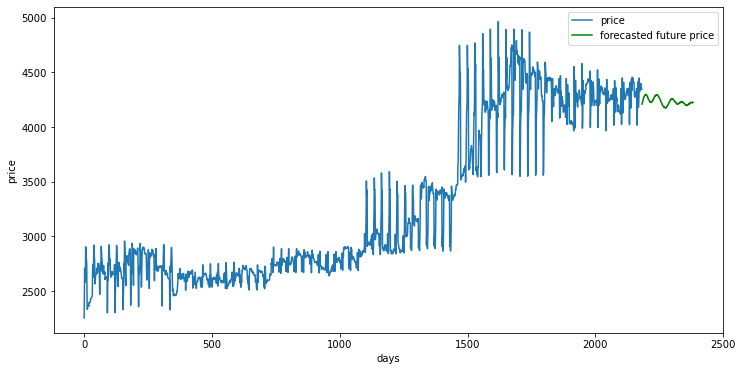

In [607]:
df["y"].plot(legend=True, label="price",figsize=(12,6))
forecast["yhat"][-200:].plot(legend=True, label="forecasted future price",c="g")
plt.xlabel("days")
plt.ylabel("price")
plt.show()

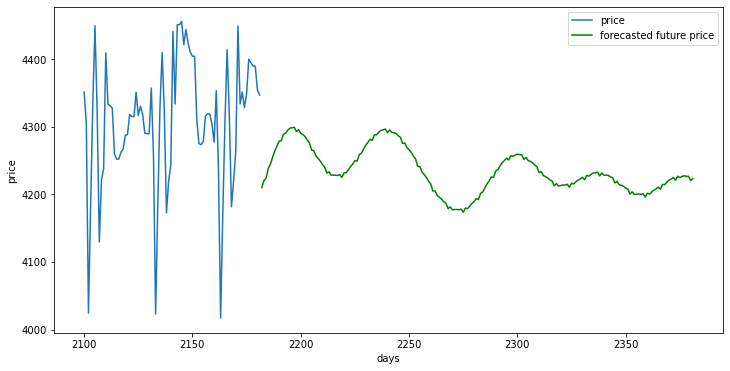

In [608]:
df["y"][2100:].plot(legend=True, label="price",figsize=(12,6))
forecast["yhat"][-200:].plot(legend=True, label="forecasted future price",c="g")
#plt.xticks(np.arange(2000,2187))
plt.xlabel("days")
plt.ylabel("price")
plt.show()